In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles, load_iris

# Логистическая регрессия
<p>Курс "Модели и методы интеллектуального анализа данных"</p>

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение. Задача классификации</a></li>
<li><a href='#env'>Линейный классификатор</a></li>
<li><a href='#binary'>Бинарная классификация</a></li>
<li><a href='#logreg'>Логистическая регрессия</a></li>
<li><a href='#regularization'>Регуляризация</a></li>
<li><a href='#example1'>Пример 1. Классификация цветов ирисов sklearn.datasets.iris</a></li>
<li><a href='#example2'>Пример 2.</a></li>
<li><a href='#links'>Ссылки</a></li>
<li><a href='#tasks'>Задания для самостоятельной работы</a></li>
</ol>

# Введение. Задача классификации <a name='intro'></a>

В задачах классификации требуется для заданных элементов определить отношение к одному из классов. Например, необходимо классифицировать клиентов в банке на основе персональных данных (надежный или ненадежный), пациентов на основе результатов анализов (входит ли в группу риска), сообщения электронной почты (является ли спамом) и т.п.

В том случае, если классов два, задача называется "бинарная классификация".

Модели, осуществляющие классификацию, называются классификаторами. Самым простым примером классификатора является линейный классификатор.

<a href='#toc'>Назад к Оглавлению</a>

# Линейный классификатор

Если задан вектор признаков $\vec{x}=(x_1, \cdots, x_n)$ и вектор весов $\vec{w}=(w_0, w_1, \cdots, w_n)$, то их линейной комбинацией является выражение


$$
y = w_0 + x_1 w_1 + \cdots + w_n x_n,
$$


или, при добавлении единицы в вектор признаков $\vec{x}=(1, x_1, \cdots, x_n)$ в более коротком виде
$$
y=w^T x.
$$

При рассмотрении задачи классификации целевым переменным $y$ назначают какое-то значение (например $1$ и $-1$ для бинарной классификации) и оценивают вероятность того, что выражение $y = w^Tx$ примет это значение. Тем самым в результате получается не только факт отнесения каждой выборки признаков к определенному классу, но и вероятность, с которой эта выборка относится к этому классу. Например, пациент может быть отнесен к зоне риска, но с небольшой вероятностью.

Проиллюстрируем механизм работы линейного классификатора на плоскости (т.е. для двух признаковых переменных). Зададим множество точек и искуственно назначим всем точкам признак цвета.

In [10]:
from sklearn.datasets import make_classification

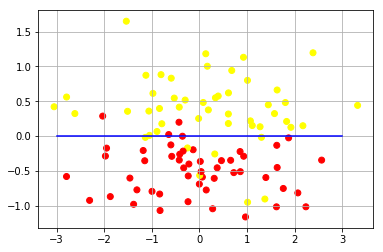

In [28]:
points, color = make_classification(n_samples=100, n_classes=2, class_sep=0.5, random_state=1)
plt.scatter(points[:,0], points[:,1], c=color, cmap='autumn')
plt.plot([-3, 3], [0, 0], c='b')
plt.grid(True)
plt.show()

Приблизительно множество желтых и красных точек мы можем разделить прямой $y=0$.

Пример иллюстрирует применение метода логистической регрессии для решения задачи классификации для объектов, обладающих двумя признаками. В общем случае (для произвольного количества признаков) метод логистической регрессии заключается в том, что признаковое пространство может быть разделено на две области гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. Гиперплоскость это пространство с размерностью на единицу меньшее, чем разделяемое пространство (например: точка делит прямую на две части, прямая делить плоскость, плоскость делит пространство).

Если такое линейное разделение можно сделать без ошибок (т.е. все точки каждого класса находятся по "свою" сторону от разделяющей гиперплоскости), то выборка называется линейно разделимой.

Ниже пример линейно разделимой пространственной выборки.

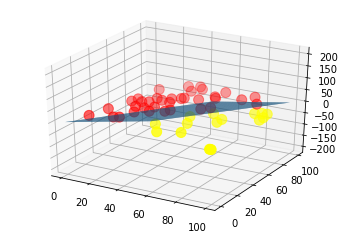

In [4]:
x = np.random.randint(1, 100, 50)
y = np.random.randint(1, 100, 50)
z = np.cos(x)
A, B, C = 2, -2, 0
color = np.array([1 if A*i+B*j+C*k>0 else 0 for i,j,k in zip(x,y,z)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, label='parametric curve', c=color, cmap='autumn', s=100)
u, v = np.meshgrid(range(100), range(100))
w = A*u+B*v
ax.plot_surface(u, v, w)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Бинарная классификация <a name='binary'></a>

Рассмотрим подробнее задачу бинарной классификации. Принадлежность к первому классу обозначим "+1", принадлежность ко второму классу обозначим "-1". Для описания отношения объекта к тому или другому классу удобно использовать функцию "сигнум" $y=\text{sign}(x)$.

$$
\text{sign}(x) = 
\left\{
    \begin{array}{l}
        -1, x<0, \\ 0, x=0, \\ 1, x>0.
    \end{array}
\right.
$$

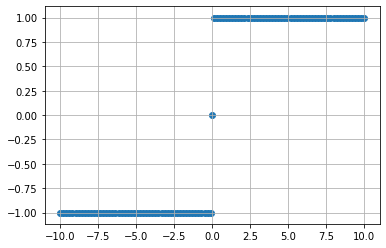

In [5]:
def signum(x):
    if x < 0:
        return -1
    elif x == 0:
        print("here")
        return 0
    else:
        return 1
xs = np.linspace(-10,10,100)
plt.grid(True)
plt.scatter(np.r_[xs, 0], np.r_[[signum(x) for x in xs], 0])
plt.show()

Линейная комбинация $y=\vec{w}^{\text{T}} \vec{x}$ возвращает значения из диапазона действительный чисел $[-\infty, \infty]$, однако вероятность отнесения к какому-то классу определяется значениями из диапазона $[0,1]$. Поэтому для объекта наблюдения, характеризуемого набором $n$ признаков, $\vec{x}=(x_1, x_2, \dots, x_n)$, определим специальную функцию

$$a (\vec{x}) = \text{sign}(\vec{w}^{\text{T}} \cdot \vec{x}),$$

где
 - $\vec{x}$ – вектор признаков вместе с единицей, т.е. $\vec{x}=(1, x_1, x_2, \dots, x_n)$,
 - $\vec{w}$ – вектор весов в линейной модели (вместе со смещением $w_0$),
 - $\text{sign}(x)$ – функция "сигнум", возвращающая знак своего аргумента,
 - $\vec{w}^{\text{T}} \cdot \vec{x} = w_0 \cdot 1 + w_1  x_1 + \dots + w_n  x_n$ - скалярное произведение векторов весов $\vec{w}$ и признаков $\vec{x}$.

Тогда функция $a(\vec{x})$ будет возвращать 
- 1, если $\vec{w}^{\text{T}} \vec{x} > 0$ (точка лежит "выше" плоскости),
- -1, если $\vec{w}^{\text{T}} \vec{x} < 0$ (точка лежит "ниже" плоскости),
- 0, если $\vec{w}^{\text{T}} \vec{x} = 0$ (точка лежит на плоскости)

Функция $a(\vec{x})$ является линейным классификатором. Геометрически, построение прогноза с помощью линейного классификатора заключается в вычислении линейной комбинации $w^Tx$ и изучении знака этого выражения. Если $w^Tx>0$, то рассматриваемый объект находится "выше" разделяющей линии (гиперплоскости в общем случае), а если $w^Tx<0$, то рассматриваемый объект "ниже".

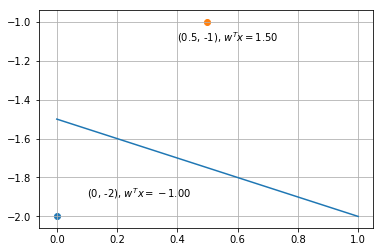

In [29]:
w = (1, 2, 3)
P1, P2 = 0, 1
Y1, Y2 = -(w[0]*P1 + w[2])/w[1], -(w[0]*P2 + w[2])/w[1]
plt.plot([P1, P2], [Y1, Y2])
plt.grid(True)

A = [0, -2]
plt.scatter(A[0], A[1])
plt.text(A[0]+0.1, A[1]+0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))

A = [0.5, -1]
plt.scatter(A[0], A[1])
plt.text(A[0]-0.1, A[1]-0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))

plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Логистическая регрессия <a name='logreg'></a>

Частным случаем линейного классификатора является логистическая регрессия, с помощью которой можно не только классифицировать объекты, но и определять вероятность отнесения объекта к определенному классу..

В задаче бинарной классификации обозначим через вероятность $p_+$ отнесение объекта $x_i$ к классу "+" (в этом случае $P_-$ это вероятность отнесения к противоположному классу). То есть для всех объектов $x_i$ и вектора весов $\vec{w}$ мы имеем вероятности отнесения к классу "+" (в этом случае условимся, что целевая переменная получает значение $1$, $y_i=1$) и к классу "-" (в этом случае $y_i=-1$):
$$p_+ = P\left(y_i = 1 \mid x_i, w\right)$$
$$p_- = P\left(y_i = -1 \mid x_i, w\right)$$

Искомая вероятность должна принимать значения от $0$ до $1$: $p_+ \in [0,1]$, но с помощью линейного классификатора мы получаем значения: $a(\vec{x}) = \vec{w}^T \vec{x} \in R = (-\infty,\infty)$. 
В модели логистической регрессии для перехода от $R=(-\infty,\infty)$ к отрезку $[0,1]$ берется сигмоид-функция: 

$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

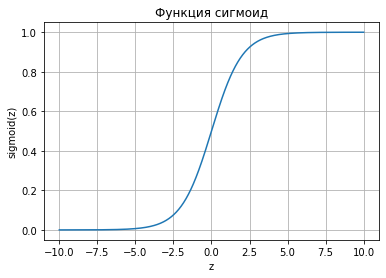

In [8]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, [sigmoid(x) for x in xs]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.title('Функция сигмоид');

Если $P(X)$ это вероятность события $X$, то $\frac{P(X)}{1-P(X)}$ это отношение вероятностей "событие произойдет" и "событие не произойдет" (отношение шансов). Вероятность и отношение шансов содержат одинаковую информацию, но $P(X)$ находится в пределах от 0 до 1, а отношение шансов - в пределах от 0 до $\infty$. Если вычислить логарифм отношения шансов (также называется "логарифм шансов", или логарифм отношения вероятностей), то его выражение будет принимать значения от $-\infty$ до $\infty$
$$
\log \left( \frac{P}{1-P} \right) \in [-\infty, \infty].
$$

С помощью логарифма шансов сделаем прогноз $p_+ = P\left(y_i = 1 \mid x_i, \vec{w}\right)$. Для этого вычислим значение $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \vec{w}^T \vec{x}$, после чего вычислим логарифм отношения шансов 
$$ 
\log \left( \frac{P}{1-P} \right) =  \vec{w}^T \vec{x},
$$
$$ 
e^{\log \left( \frac{P}{1-P} \right)} =  \frac{P}{1-P} = e^{\vec{w}^T \vec{x}},
$$
$$P = \frac{e^{\vec{w}^T \vec{x}}}{1 + e^{\vec{w}^T\vec{x}}} =  
\frac{1}{1 + e^{-\vec{w}^T\vec{x}}} = \sigma(\vec{w}^T \vec{x})
$$


В правой части мы получили как раз сигмоид-функцию.

Итак, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели и вектора признаков примера:

$$p_+(x_i) = P\left(y_i = 1 \mid \vec{x}_i, \vec{w} \right) = \sigma(\vec{w}^T \vec{x}_i).$$


При обучении модели логистической регрессии веса модели $\vec{w}$ подбираются таким образом, чтобы минимизировать целевую функцию - логистическую функцию потерь (определяется далее). То есть решается оптимизационная задача.

Логистическая регрессия моделирует вероятность отнесения примера к классу "+"

$$
p_+(\vec{x}_i) = P\left(y_i = 1 \mid \vec{x}_i, \vec{w}\right) = 
\sigma(\vec{w}^T\vec{x}_i)
$$

Тогда для класса "-":

$$
p_-(\vec{x}_i)  = P\left(y_i = -1 \mid \vec{x}_i, \vec{w} \right)  = 
1 - \sigma(\vec{w}^T \vec{x}_i) = \sigma(-\vec{w}^T \vec{x}_i) 
$$

Этих выражения можно объединить в одно:

$$
P\left(y = y_i \mid \vec{x}_i, \vec{w} \right) = 
\sigma(y_i \vec{w}^T \vec{x}_i)
$$

Выражение $M(\vec{x}_i) = y_i\vec{w}^T \vec{x}_i$ называется отступом (margin) классификации на объекте $\vec{x}_i$. 
Если он неотрицателен, модель не ошибается на объекте $\vec{x}_i$, если же отрицателен – значит, класс для $\vec{x}_i$  спрогнозирован неправильно. 
Заметим, что отступ определен для объектов именно обучающей выборки, для которых известны реальные метки целевого класса $y_i$.


Из курса линейной алгебры известно, что расстояние от точки с радиус-вектором $\vec{x}_A$ до плоскости, которая задается уравнением $\vec{w}^T \vec{x} = 0$ вычисляется по формуле
$$
\rho(\vec{x}_A, \vec{w}^T \vec{x} = 0) = \frac{\vec{w}^T \vec{x}_A}{||\vec{w}||}
$$


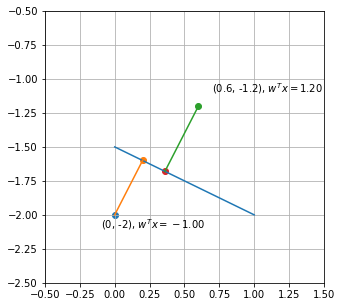

In [9]:
plt.rcParams['figure.figsize']=(5,5)
plt.xlim(-0.5, 1.5)
plt.ylim(-2.5, -0.5)

w = (1, 2, 3)
P1, P2 = 0, 1
Y1, Y2 = -(w[0]*P1 + w[2])/w[1], -(w[0]*P2 + w[2])/w[1]
plt.plot([P1, P2], [Y1, Y2])
plt.grid(True)

A = [0, -2]
plt.scatter(A[0], A[1])
plt.text(A[0]-0.1, A[1]-0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))
AX1 = (-w[0]*w[2]+w[1]**2*A[0]-w[0]*w[1]*A[1])/(w[0]**2+w[1]**2)
AY1 = (-w[1]*w[2]+w[0]**2*A[1]-w[0]*w[1]*A[0])/(w[0]**2+w[1]**2)
plt.scatter(AX1, AY1)
plt.plot([A[0],AX1], [A[1], AY1])

A = [0.6, -1.2]
plt.scatter(A[0], A[1])
plt.text(A[0]+0.1, A[1]+0.1, "({}, {}), $w^Tx={:.2f}$".format(A[0], A[1], w[2]+w[0]*A[0]+w[1]*A[1]))
AX1 = (-w[0]*w[2]+w[1]**2*A[0]-w[0]*w[1]*A[1])/(w[0]**2+w[1]**2)
AY1 = (-w[1]*w[2]+w[0]**2*A[1]-w[0]*w[1]*A[0])/(w[0]**2+w[1]**2)
plt.scatter(AX1, AY1)
plt.plot([A[0],AX1], [A[1], AY1])

plt.show()

То есть чем больше по модулю выражение $\vec{w}^T \vec{x}_i$, тем дальше точка $\vec{x}_i$ находится от плоскости $\vec{w}^T \vec{x} = 0$.

Оценим вероятность наблюдения вектора целей $\vec{y}$ для выборки $X$, где матрица $X$ составлена из векторов признаков наблюдаемых объектов $\vec{x_i}$.

$$
P \left(\vec{y} \mid X, \vec{w} \right) = \prod_{i=1}^{l} P \left(y = y_i \mid \vec{x}_i, \vec{w}\right),
$$

где $l$ – число строк матрицы $X$ (длина выборки).

Для упрощения вычислений возьмем логарифм от правой и левой частей выражения.

$$
\log P \left(\vec{y} \mid X, \vec{w} \right) = 
\log \sum_{i=1}^{l} P \left(y = y_i \mid \vec{x}_i, \vec{w} \right) = \log \prod_{i=1}^{l} \sigma(y_i\vec{w}^T\vec{x}_i)   
= 
$$

$$
= 
\sum_{i=1}^{l} \log \sigma ( y_i \vec{w}^T \vec{x}_i ) = \sum_{i=1}^{l} \log \frac{1}{1 + \exp^{-y_i\vec{w}^T \vec{x}_i }}
$$

$$
= - \sum_{i=1}^{l} \log (1 + \exp^{-y_i \vec{w}^T \vec{x}_i})
$$

То есть в данном случае принцип максимизации правдоподобия приводит к минимизации выражения 

$$
L_{log} (X, \vec{y}, \vec{w}) = 
\sum_{i=1}^{l} \log (1 + \exp^{-y_i\vec{w}^T\vec{x}_{i}}).
$$

Это логистическая функция потерь, она получается суммированием по всем объектам обучающей выборки.

Посмотрим на новую фунцию как на функцию от отступа: $L(M) = \log (1 + \exp^{-M})$. 

Нарисуем ее график, а также график 1/0 функциий потерь (zero-one loss), которая просто штрафует модель на 1 за ошибку на каждом объекте (отступ отрицательный): $L_{1/0}(M) = [M < 0]$.

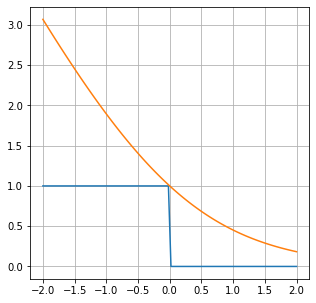

In [10]:
def f1(x):
    if x<=0:
        return 1
    else:
        return 0

def f2(x):
    return(np.log2(1+np.exp(-x)))

xs = np.linspace(-2,2,100)
plt.grid(True)
plt.plot(xs, [f1(i) for i in xs])
plt.plot(xs, [f2(i) for i in xs])
plt.show()

Наиболее точно описывает ошибки при классификации 1/0 функция потерь $L_{1/0}$, которая просто штрафует модель на $1$ при каждой ошибке.
Однако 1/0 функцию потерь нельзя оптимизировать градиентными методами, поскольку производная в нуле обращается в бесконечность. Поэтому минимазация проводится для верхней оценки 1/0 функции потерь - логистической функции потерь $L_{\log}$

$$
L_{\text{1/0}} (X, \vec{y}, \vec{w}) = 
\sum_{i=1}^{l} [M(\vec{x}_i) < 0] \leq \sum_{i=1}^{l} \log (1 + \exp^{-y_i\vec{w}^T \vec{x}_i}) = 
L_{\log} (X, \vec{y}, \vec{w}), 
$$

где $L_{\text{1/0}} (X, \vec{y}, \vec{w})$ – число ошибок логистической регрессии с весами $\vec{w}$ 
на выборке $(X, \vec{y})$.

То есть при уменьшениия верхней оценки функции $L_{\log}$ на число ошибок классификации уменьшается и само число ошибок.

<a href='#toc'>Назад к Оглавлению</a>

# $L_2$ регуляризация логистической функции потерь <a name='regularization'></a>

Регуляризация используется для борьбы с переобучением. При $L_2$-регуляризации минимизируется функция:

$$
M(X, \vec{y}, \vec{w}) = L_{\log} (X, \vec{y}, \vec{w}) + \lambda |\vec{w}|^2
$$

В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$. И тогда решением задачи будет

$$
\widehat{\vec{w}}  = \arg \min_{\vec{w}} M(X, \vec{y}, \vec{w}) =  
$$
$$
=
\arg \min_{\vec{w}} (C \sum_{i=1}^{l} \log (1 + \exp^{-y_i\vec{w}^T \vec{x}_i})+ |\vec{w}|^2).
$$ 


<a href='#toc'>Назад к Оглавлению</a>

# Пример 1. Классификация цветом ирисов sklearn.dataset.iris <a name='example1'></a>

Из типового dataset библиотеки sklearn загрузим данные о цветах ирисах с информацией о размерах чашелистника (sepal) и лепестка (petal). Для каждого объекта известен тип ириса. Необходимо построить модель классификации.

In [11]:
# sklearn.datasets.load_iris()

flowers = load_iris()
dir(flowers)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [12]:
print(flowers.feature_names)
print(flowers.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Разделим выборку на тренировочный и тестовый набор.

In [13]:
# sklearn.model_selection.train_test_split()
X_train, X_check, y_train, y_check = train_test_split(flowers.data, flowers.target)

Обучим классификатор.

In [14]:
# sklearn.linear_model.LogisticRegression()
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Chernishov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chernishov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
clf.score(X_check, y_check)

0.9736842105263158

На отложенной выборке результат классификации 92%.

<a href='#toc'>Назад к Оглавлению</a>

# Пример 2 <a name='example2'></a>

Вернемся к примеру из начала лекции, при этом увеличим шум.

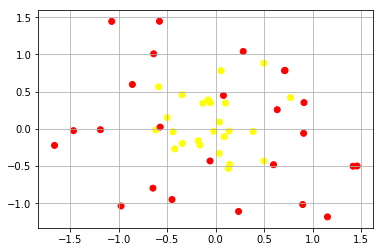

In [25]:
points, color = make_circles(n_samples=50, 
                             shuffle=True, 
                             noise=0.35, 
                             random_state=1, 
                             factor=0.2)
plt.scatter(points[:,0], points[:,1], c=color, cmap='autumn')
plt.grid(True)
plt.show()

Данное множество точек невозможно разделить на классы по цветам одной линией, но можно применить специальный прием-преобразование, после которого это разделение станет возможным.. Построим данные точки в полярной системе координат, используя формулы
$$
r = x^2 + y^2, \Phi = \arctan\left( \frac{y}{x}\right).
$$

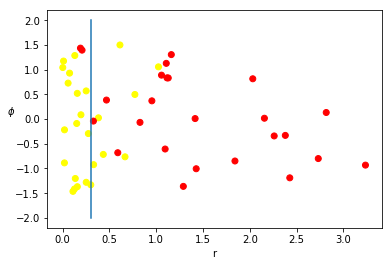

In [26]:
r = []; f = []
for i in range(len(points)):
    r.append(points[i,0]**2+points[i,1]**2)
    f.append(np.arctan(points[i,1]/points[i,0]))
plt.scatter(r, f, c=color, cmap='autumn')
plt.plot([0.3,0.3], [-2,2])
plt.xlabel("r"); plt.ylabel("$\phi$", rotation=0)
plt.show()

Очевидно, что линейно разделить множества уже не получается.

In [18]:
# sklearn.model_selection.StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.linspace(-1, 2, 10)


model = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)

In [19]:
# sklearn.linear_model.LogisticRegression()
model = LogisticRegression()

model.fit(np.c_[np.array(r), np.array(f)], color)
res = model.predict([[1,1], [-1,-1]])

C:\Users\Chernishov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
for elem in dir(model):
    print(elem, end=",  ")

C,  __class__,  __delattr__,  __dict__,  __dir__,  __doc__,  __eq__,  __format__,  __ge__,  __getattribute__,  __getstate__,  __gt__,  __hash__,  __init__,  __init_subclass__,  __le__,  __lt__,  __module__,  __ne__,  __new__,  __reduce__,  __reduce_ex__,  __repr__,  __setattr__,  __setstate__,  __sizeof__,  __str__,  __subclasshook__,  __weakref__,  _estimator_type,  _get_param_names,  _get_tags,  _predict_proba_lr,  class_weight,  classes_,  coef_,  decision_function,  densify,  dual,  fit,  fit_intercept,  get_params,  intercept_,  intercept_scaling,  l1_ratio,  max_iter,  multi_class,  n_iter_,  n_jobs,  penalty,  predict,  predict_log_proba,  predict_proba,  random_state,  score,  set_params,  solver,  sparsify,  tol,  verbose,  warm_start,  

In [21]:
A, B = model.coef_[0]; C = model.intercept_

Значения, которые находятся в полях model.coef_ и model.intercept_, являются коэффициентами уравнения разделяющей прямой $Ax+By+C=0$. Если в уравнении прямой в явном виде выразить $y$, то оно примет вид $y(x) = \frac{-Ax-C}{B} = 
-\frac{A}{B}x-\frac{C}{B}$.

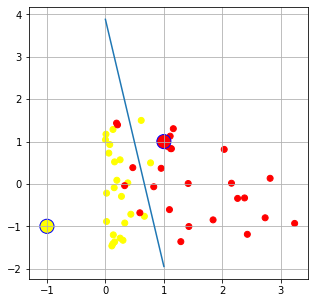

In [22]:
plt.scatter(r, f, c=color, cmap='autumn')
plt.scatter([1,-1],[1,-1], c=res, s=200, cmap='autumn', edgecolors='b')
plt.grid(True)
plt.plot([0, 1], [(-A*0-C)/B, (-A*1-C)/B])
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

<a href='#toc'>Перейти к Оглавлению</a>

# Задание для самостоятельной работы <a name='hometask'></a>

<a href='#toc'>Перейти к Оглавлению</a>